In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

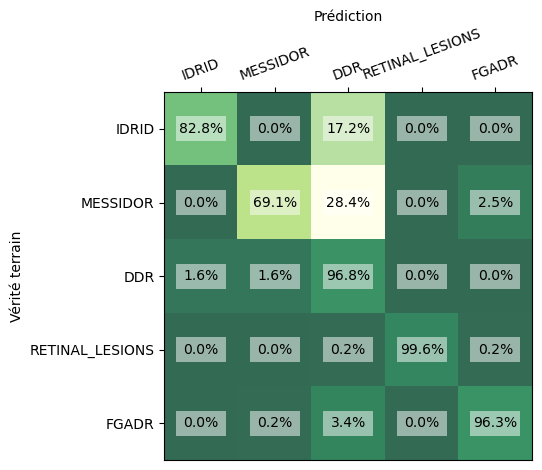

In [33]:
datasets = ['IDRID', 'MESSIDOR', 'DDR', 'RETINAL_LESIONS', 'FGADR']

confMat = np.asarray([[24,0,5,0,0],
[0,56,23,0,2],
[3,3,179,0,0],
[0,0,1,553,1],
[0,1,17,0,475]])


c = confMat
c = confMat / confMat.sum(1)[:, np.newaxis]
img = cm.RdYlGn(c, alpha=0.8)
diag = c.copy()
np.fill_diagonal(diag, 0)
diag = diag/diag.max()
img_r = cm.YlGn_r(diag, alpha=0.8)

eye = np.eye(5)[:,:, np.newaxis]
img = img * eye + (1-eye) * img_r

ax = plt.subplot()
ax.imshow(img, interpolation=None)

for (i, j), z in np.ndenumerate(c):
    ax.text(j, i, '{:0.1%}'.format(z), ha='center', va='center', color='black')
    w = 0.68
    h = w/2
    rectangle = plt.Rectangle((j-w/2,i-h/2), w, h, fc='white', alpha=0.5)
    ax.add_patch(rectangle)
plt.yticks(np.arange(5), datasets)
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.tight_layout()
plt.xticks(np.arange(5), datasets, rotation=20, ha="center")
ax = plt.gca()

ax.xaxis.set_ticks_position('top')

ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.savefig('probe_confMat.png', dpi=300)


array([[0.82758621, 0.        , 0.17241379, 0.        , 0.        ],
       [0.        , 0.69135802, 0.28395062, 0.        , 0.02469136],
       [0.01621622, 0.01621622, 0.96756757, 0.        , 0.        ],
       [0.        , 0.        , 0.0018018 , 0.9963964 , 0.0018018 ],
       [0.        , 0.0020284 , 0.03448276, 0.        , 0.96348884]])